# The Ultimate Python Seaborn Tutorial

This code was developed following the tutorial [The Ultimate Python Seaborn Tutorial](https://elitedatascience.com/python-seaborn-tutorial), with slightly modifications. All work must be credited to [EliteDataScience](https://elitedatascience.com) team.

## Step 1: Installation Seaborn

If you are reading this notebook in a Jupyter notebook environment, probably you already have all the tools you need to follow this tutorial. Otherwise, the [Anaconda suite](https://anaconda.org/) is the recomended way to install all these libraries, including the Python programming language.

## Step 2: Importing libraries and dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('Pokemon.csv', index_col=0)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


## Step 3: Seaborn's plotting functions.

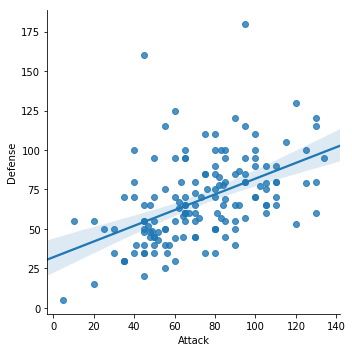

In [4]:
# recommended way'
_ = sns.lmplot(data=df, x='Attack', y='Defense')

# alternative way
#sns.lmplot(x=df.Attack, y=df.Defense)

## Step 4: Customizing with Matplotlib.

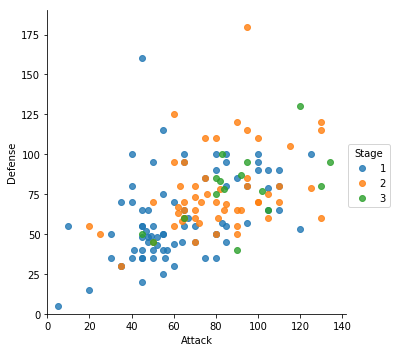

In [5]:
sns.lmplot(data=df, x='Attack', y='Defense', fit_reg=False, hue='Stage')

_ = plt.xlim(0, None)
_ = plt.ylim(0, None)

## Step 5: The role of Pandas.

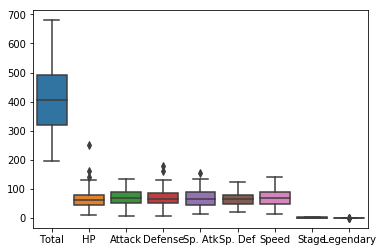

In [6]:
_ = sns.boxplot(data=df)

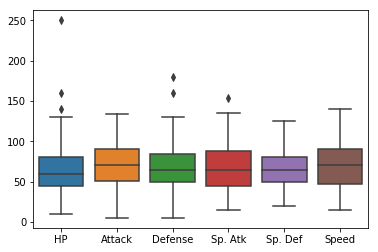

In [7]:
stats_df = df.drop(columns=['Total', 'Stage', 'Legendary'])
_ = sns.boxplot(data=stats_df)

## Step 6: Seaborn themes

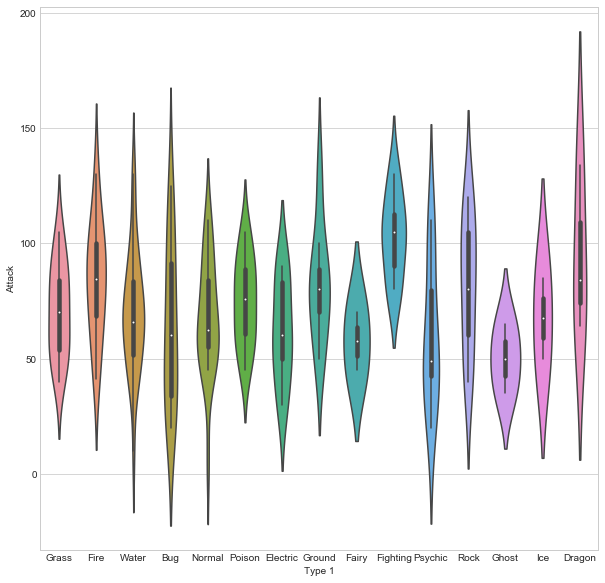

In [13]:
# set theme
sns.set_style('whitegrid')

# violin plot
fig = plt.figure(figsize=(10, 10))
_ = sns.violinplot(x='Type 1' , y='Attack', data=df)

## Step 7: Color palletes

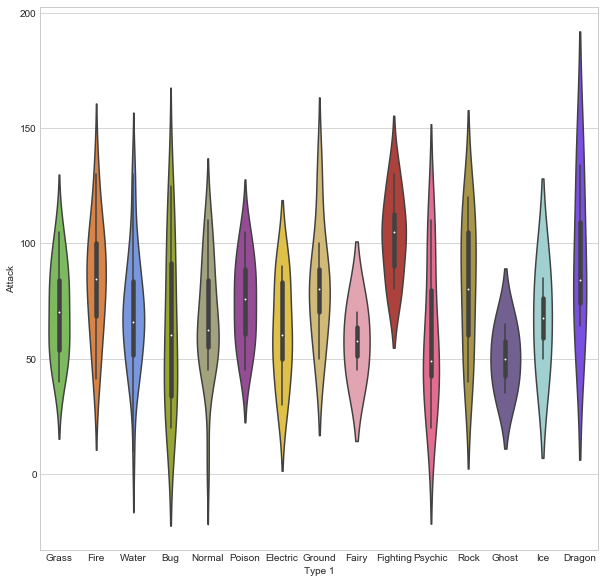

In [16]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

fig = plt.figure(figsize=(10, 10))
_ = sns.violinplot(x='Type 1' , y='Attack', data=df, palette=pkmn_type_colors)

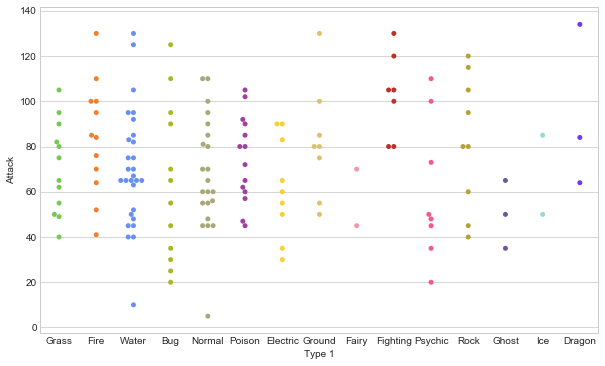

In [21]:
# Swarm plot with Pokémon color pallete
fig = plt.figure(figsize=(10, 6))
_ = sns.swarmplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)

## Step 8: Overlaying plots

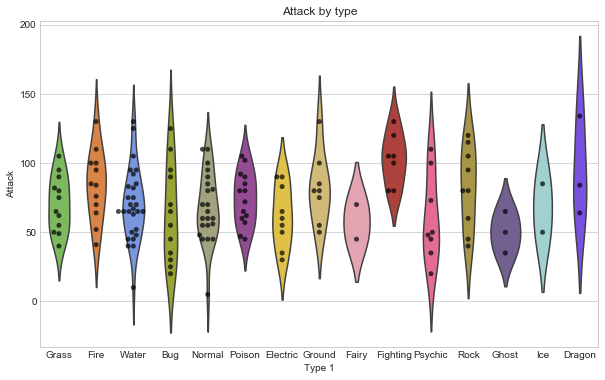

In [23]:
# Set figure size with matplotlib
plt.figure(figsize=(10, 6))

# create plot
sns.violinplot(x='Type 1', y='Attack', data=df, inner=None, palette=pkmn_type_colors)

sns.swarmplot(x='Type 1', y='Attack', data=df, color='k', alpha=0.7)

# Set title with matplotlib
_ = plt.title('Attack by type')

## Step 9: Putting all together

In [24]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


In [26]:
melted_df = pd.melt(stats_df, id_vars=['Name', 'Type 1', 'Type 2'], var_name='Stats')
melted_df.head()

,Name,Type 1,Type 2,Stats,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


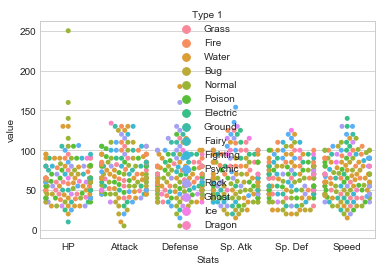

In [32]:
# Swarmplot with melted_df
_ = sns.swarmplot(data=melted_df, x='Stats', y='value', hue='Type 1')

Next, we are going to apply some tweaks to make our plot more readable:

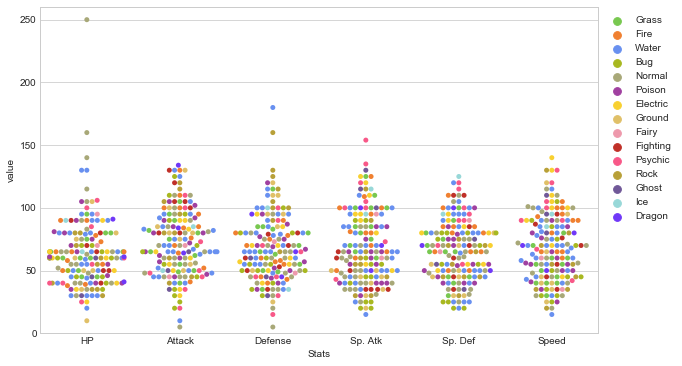

In [36]:
# 1. Enlarge the plot
plt.figure(figsize=(10, 6))

sns.swarmplot(data=melted_df,
             x='Stats',
             y='value',
             hue='Type 1', # 2. Separate point by hue
             palette=pkmn_type_colors) # 3. Use Pokémon pallete

# 4. Adjust the y-axis
plt.ylim(0, 260)

# 5. Place the legend to the right
_ = plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

## Step 10: Pokédex (mini-gallery)

### 10.1 - Heatmap

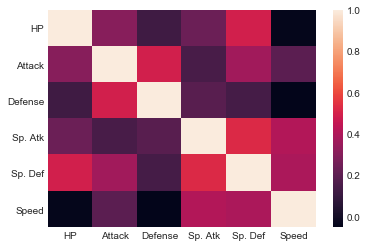

In [39]:
# Calculate the correlation matrix
corr = stats_df.corr()

# Heatmap
sns.set_style('whitegrid')
_ = sns.heatmap(corr)

### 10.2 Histograms

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


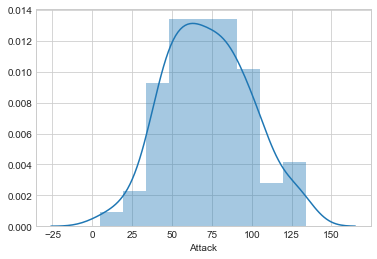

In [42]:
# Distribution plot (a.k.a Histogram)
_ = sns.distplot(df.Attack)

### 10.3 Bar Plot

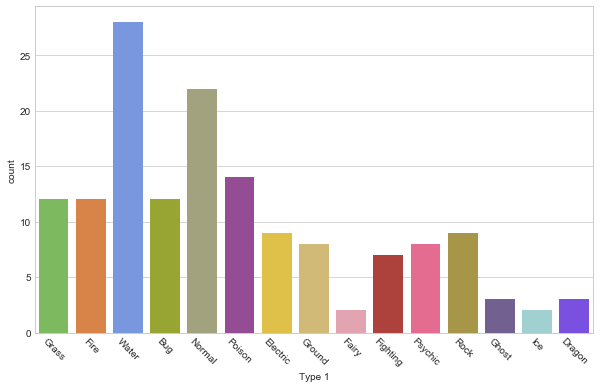

In [46]:
# Count plot (a.k.a Bar Plot)
_ = plt.figure(figsize=(10, 6))
_ = sns.countplot(data=df, x='Type 1', palette=pkmn_type_colors)

# Rotate x-labels
_ = plt.xticks(rotation=-45)

### 10.4 Factor plot

Factor plots make it easy separate plots by categorical values

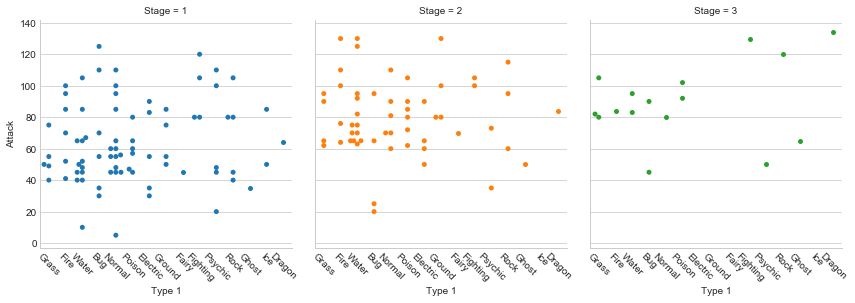

In [49]:
# Factor plot
g = sns.factorplot(data=df,
                  x='Type 1',
                  y='Attack',
                  hue='Stage', # color by stage
                  col='Stage', # Separate plot by stage
                  kind='swarm') # Swarmplot

# Rotate x-axis labels
_ = g.set_xticklabels(rotation=-45)

# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

### 10.5 Density plot

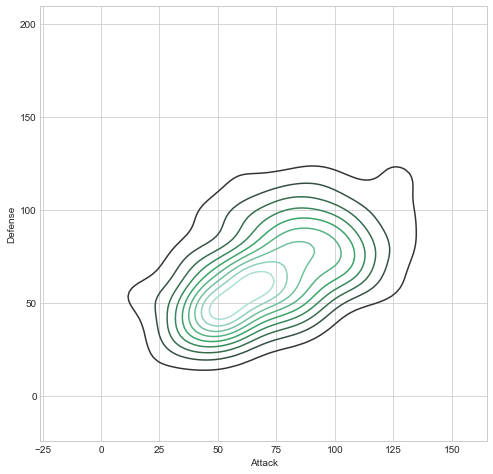

In [56]:
# Density plot
plt.figure(figsize=(8, 8))
_ = sns.kdeplot(df['Attack'], df['Defense'])

### 10.6: Joint Distribution plot

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


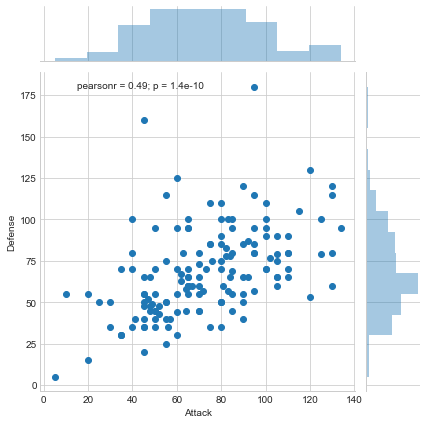

In [57]:
# Joint Distribution plot
sns.jointplot(data=df, x='Attack', y='Defense')